# import & load

In [552]:
import pandas as pd
import os
from IPython.display import clear_output

In [519]:
# Load csvs
current_working_directory = os.getcwd()

df_categories = pd.read_csv(current_working_directory + '\\categories.csv')
df_category_revenues = pd.read_csv(current_working_directory + '\\category_revenues.csv')
df_distance = pd.read_csv(current_working_directory + '\\distance_utf8.csv')
df_store_revenues = pd.read_csv(current_working_directory + '\\store_revenues_utf8.csv')
df_stores = pd.read_csv(current_working_directory + '\\stores.csv')
df_visits_full = pd.read_csv(current_working_directory + '\\visits_full.csv',parse_dates=['DateTime'])

# df_categories

In [472]:
# drop any completely duplicated rows
df_categories.drop_duplicates(inplace = True)

# check for any missing values and make sure the dtype is correct
df_categories.info()

# output
df_categories_final = df_categories
df_categories_final.info()
df_categories_final.to_csv(current_working_directory + '\\jimi_categories.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 2 columns):
Category_ID      23 non-null int64
Category_name    23 non-null object
dtypes: int64(1), object(1)
memory usage: 552.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 2 columns):
Category_ID      23 non-null int64
Category_name    23 non-null object
dtypes: int64(1), object(1)
memory usage: 552.0+ bytes


# df_category_revenues

In [473]:
# drop any completely duplicated rows
df_category_revenues.drop_duplicates(inplace = True)

# check for any missing values and make sure the dtype is correct
df_category_revenues.info()

# make sure the number of rows are correct
assert df_category_revenues['Category_ID'].max() * 6 == df_category_revenues.shape[0]

# make sure Category_ID/Category_name matches with df_categories
df_test = pd.merge(left = df_category_revenues,right = df_categories,on='Category_ID',how = 'inner')
assert (df_test['Category_name_x'] == df_test['Category_name_y']).sum() == df_category_revenues.shape[0]

# output
df_category_revenues_final = df_category_revenues
df_category_revenues_final.info()
df_category_revenues_final.to_csv(current_working_directory + '\\jimi_category_revenues.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 5 columns):
Category_ID      132 non-null int64
Category_name    132 non-null object
Month            132 non-null int64
Year             132 non-null int64
Revenue          132 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 5 columns):
Category_ID      132 non-null int64
Category_name    132 non-null object
Month            132 non-null int64
Year             132 non-null int64
Revenue          132 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.2+ KB


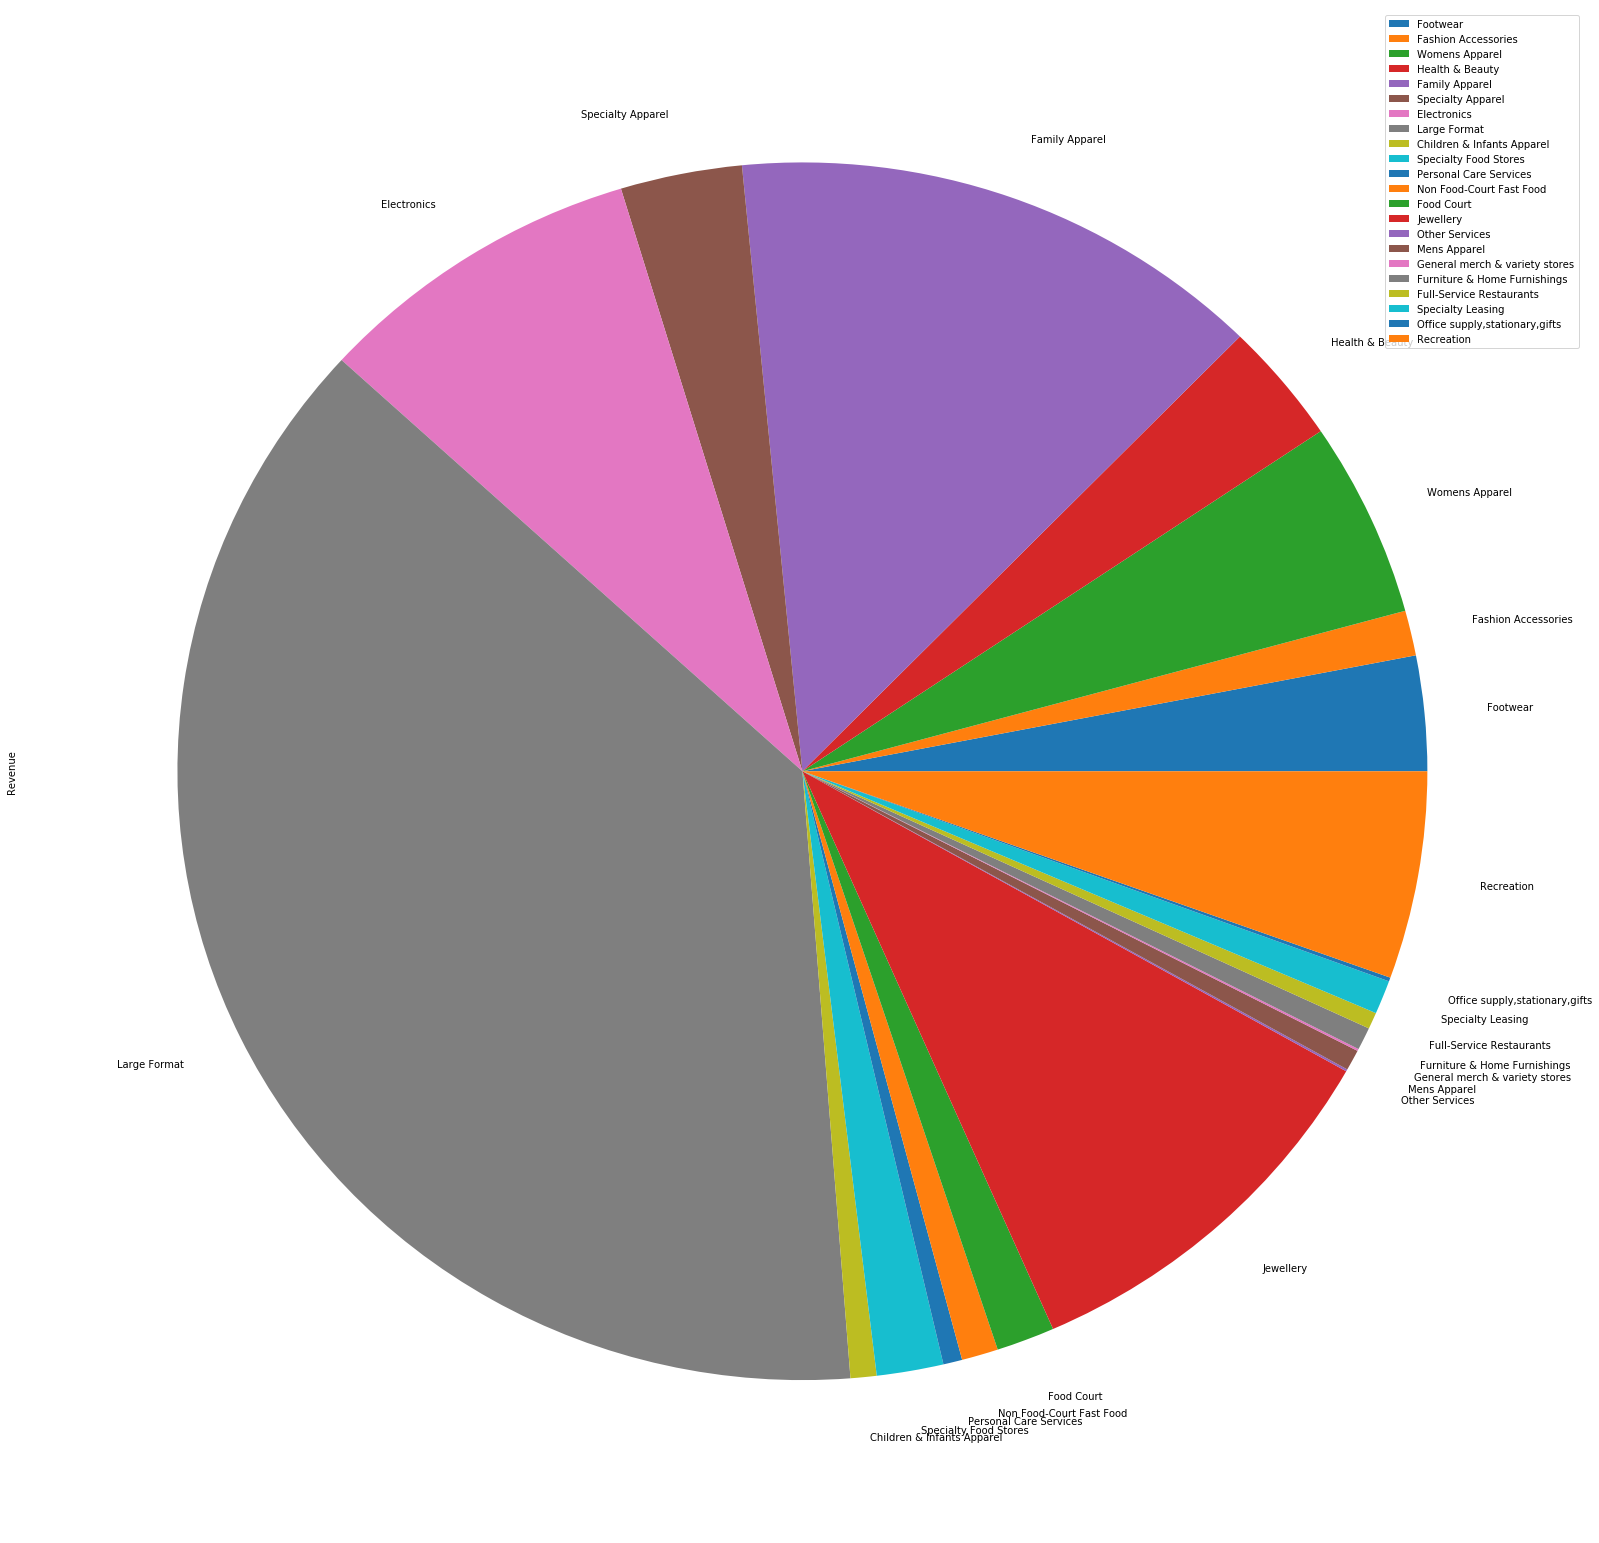

In [168]:
# draw pie chart of revenue by catogery over the entire 6 months
aggregation_function = {'Category_ID':'mean','Month':'max','Year':'mean','Revenue':'sum'}
df_category_revenues_by_category = df_category_revenues.groupby(df_category_revenues['Category_name']).aggregate(aggregation_function).sort_values(by = 'Category_ID', ascending = True)
plot = df_category_revenues_by_category.plot.pie(y = 'Revenue', figsize = (28, 28))

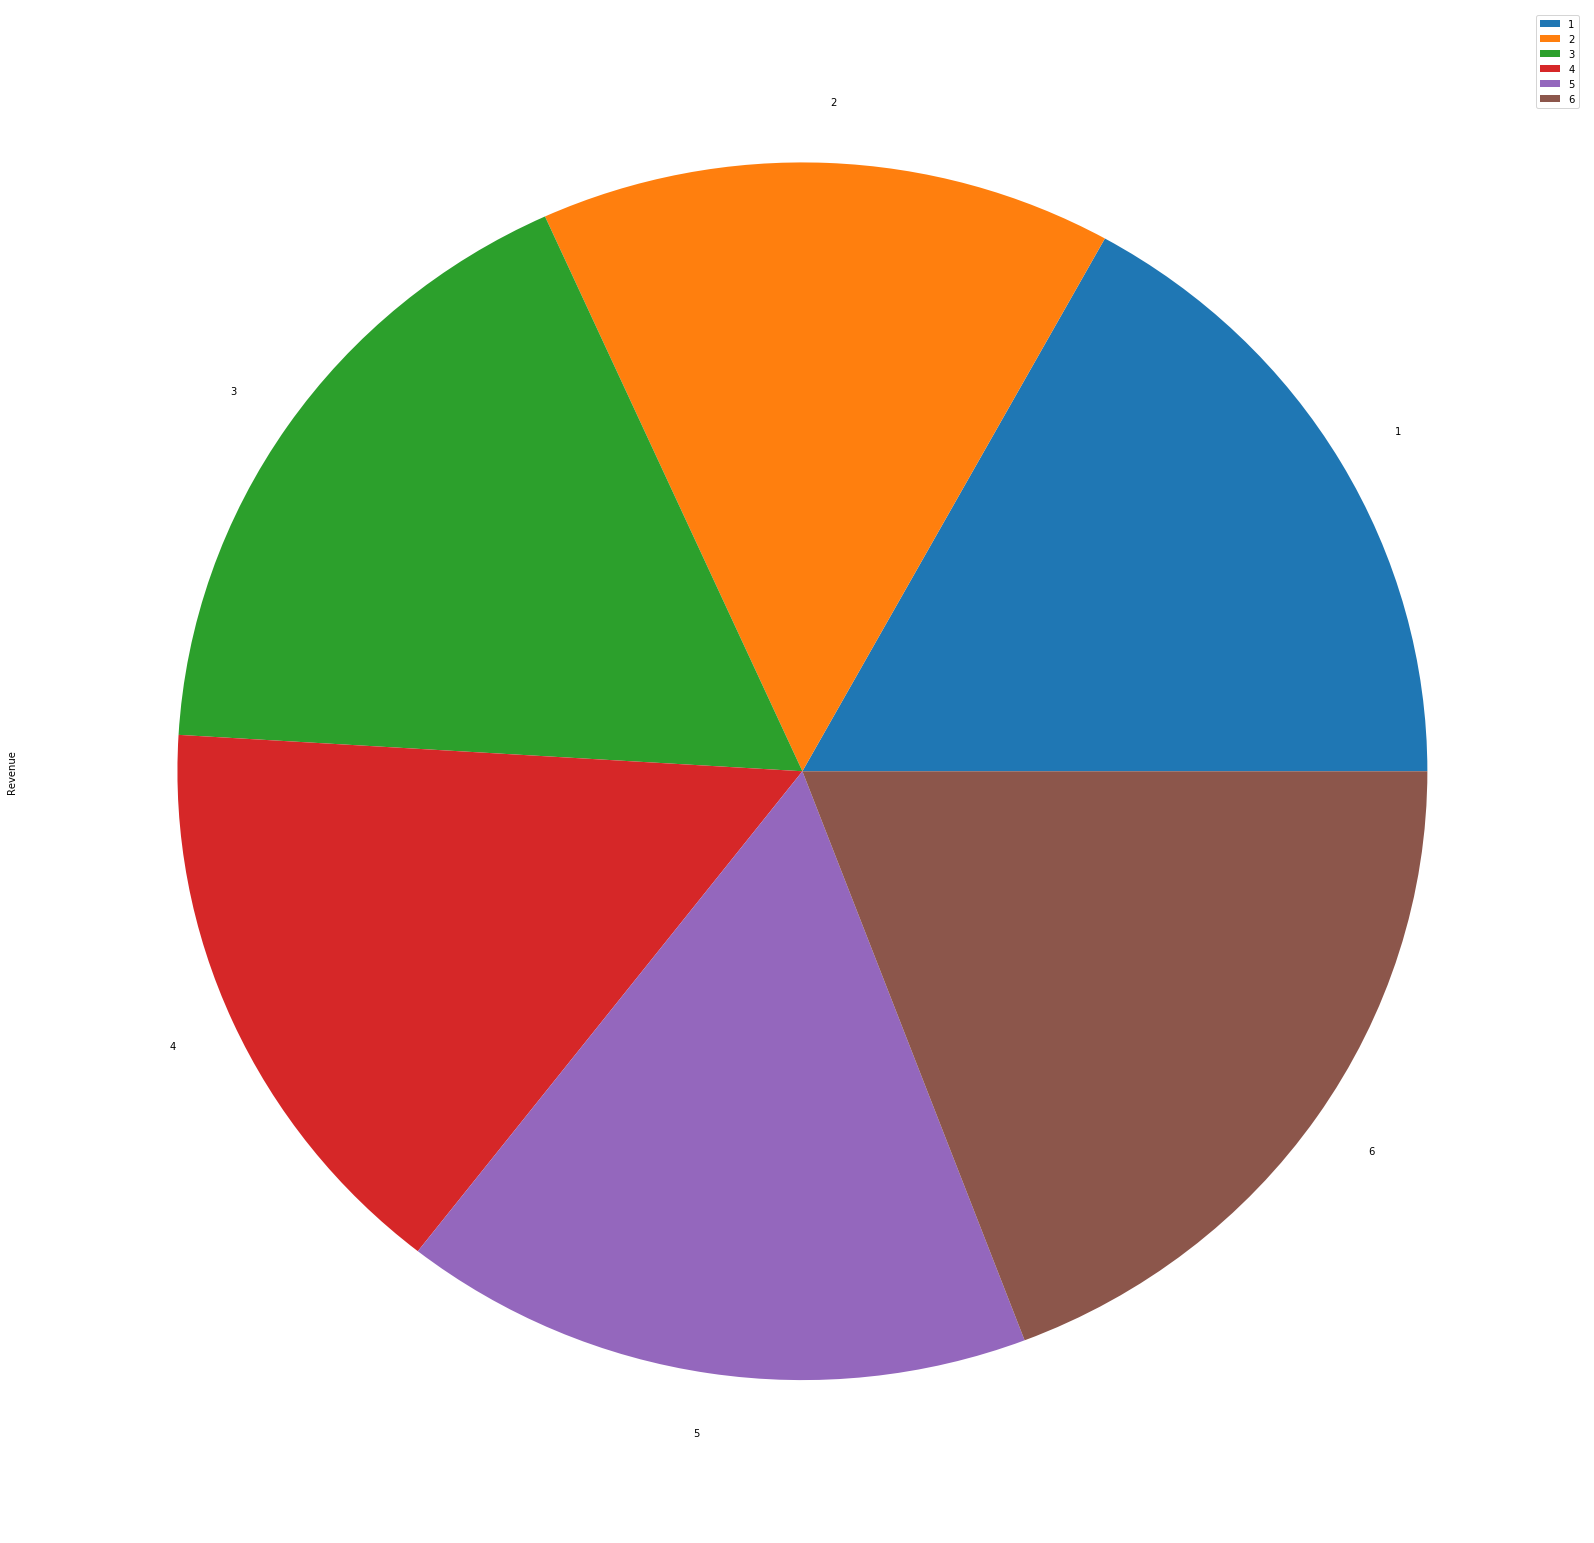

In [169]:
# draw pie chart of revenue by month over the entire 22 categories
aggregation_function = {'Category_ID':'mean','Category_name':'first','Year':'mean','Revenue':'sum'}
df_category_revenues_by_category = df_category_revenues.groupby(df_category_revenues['Month']).aggregate(aggregation_function).sort_values(by = 'Month', ascending = True)
plot = df_category_revenues_by_category.plot.pie(y = 'Revenue', figsize = (28, 28))

# df_distance

In [7]:
# drop any completely duplicated rows
df_distance.drop_duplicates(inplace = True)

# check and make sure store pair x,y has the same distance with store pair y,x
key = []
issues = []
df_test = df_distance.copy()
for index,row in df_test.iterrows():
    key.append(str(sorted([row['Name_store_ID1'],row['Name_store_ID2']])))
df_test['store_pairs'] = key

key = list(set(key))
for n in range(0,len(key)):
    if len(df_test[df_test.store_pairs == key[n]].Distance.unique()) != 1:
        issues.append(key[n])
    clear_output(wait = True)
    print("Current progress: " + str(int((n + 1) * 100 / len(key))) + "%")

# check for any missing values and make sure the dtype is correct
df_distance.info()

# check and make sure there are no close-to-zero distances like 0.01, etc.
df_distance[(df_distance.Distance <= 5) & (df_distance.Distance != 0)]

Current progress: 100%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88790 entries, 0 to 90600
Data columns (total 5 columns):
Name_store_ID1    88790 non-null object
Name_store_ID2    88790 non-null object
Store_ID1         64354 non-null float64
Store_ID2         64367 non-null float64
Distance          88790 non-null float64
dtypes: float64(3), object(2)
memory usage: 4.1+ MB


,Name_store_ID1,Name_store_ID2,Store_ID1,Store_ID2,Distance
81542,Bank Machine,Strollers,NaN,NaN,3.53
82142,Strollers,Bank Machine,NaN,NaN,3.53
82461,East Guest Experience Booth,Gift Cards,NaN,NaN,2.45
82462,Main Guest Experience Booth,Gift Cards,NaN,NaN,1.61
82463,South Guest Experience Booth,Gift Cards,NaN,NaN,3.37
86961,Gift Cards,East Guest Experience Booth,NaN,NaN,2.45
87262,Gift Cards,Main Guest Experience Booth,NaN,NaN,1.61
87563,Gift Cards,South Guest Experience Booth,NaN,NaN,3.37


In [8]:
# for pairs in issues:
# average and replace distances if 2 observations per pair
# remove odd pair out if 3 observations per pair
df_distance_final = df_test.reset_index()
df_distance_final.drop(axis = 1,labels = 'index',inplace = True)
for n in issues:
    if df_distance_final[df_distance_final.store_pairs == n].shape[0] == 3:
        index = df_distance_final[df_distance_final.store_pairs == n].index
        if df_distance_final.at[index[0],'Distance'] == df_distance_final.at[index[1],'Distance']:
            df_distance_final.drop(index = index[2],inplace = True)
        elif df_distance_final.at[index[1],'Distance'] == df_distance_final.at[index[2],'Distance']:
            df_distance_final.drop(index = index[0],inplace = True)
        else:
            df_distance_final.drop(index = index[1],inplace = True)
    elif df_distance_final[df_distance_final.store_pairs == n].shape[0] == 2:
        new_average = df_distance_final[df_distance_final.store_pairs == n].Distance.unique().sum() / 2
        index = df_distance_final[df_distance_final.store_pairs == n].index
        df_distance_final.at[index[0],'Distance'] = new_average
        df_distance_final.at[index[1],'Distance'] = new_average
df_distance_final = df_distance_final.reset_index()
df_distance_final.drop(axis = 1,labels = 'index',inplace = True)

# output
df_distance_final
df_distance_final.info()
df_distance_final.to_csv(current_working_directory + '\\jimi_distance.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88508 entries, 0 to 88507
Data columns (total 6 columns):
Name_store_ID1    88508 non-null object
Name_store_ID2    88508 non-null object
Store_ID1         64072 non-null float64
Store_ID2         64154 non-null float64
Distance          88508 non-null float64
store_pairs       88508 non-null object
dtypes: float64(3), object(3)
memory usage: 4.1+ MB


# df_store_revenues

In [474]:
# drop any completely duplicated rows
df_store_revenues.drop_duplicates(inplace = True)

# reset index
df_store_revenues = df_store_revenues.reset_index()
df_store_revenues.drop(axis = 1,labels = 'index',inplace = True)

# check for any missing values and make sure the dtype is correct
df_store_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 5 columns):
Store_ID    1409 non-null int64
Name        1409 non-null object
Month       1409 non-null int64
Year        1409 non-null int64
Revenue     1409 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 55.1+ KB


In [475]:
# making sure number of unique store IDs match with number of unique store names
assert len(df_store_revenues.Name.unique()) == len(df_store_revenues.Store_ID.unique())

# dropping all rows with close to 0 revenues
index = list(df_store_revenues[df_store_revenues.Revenue < 5].index)
df_store_revenues.drop(index = index,inplace=True)

# reset index
df_store_revenues = df_store_revenues.reset_index()
df_store_revenues.drop(axis = 1,labels = 'index',inplace = True)

# making sure each store has 6 month's revenue
issues_store_revenues = {}
stores = df_store_revenues.Name.unique()
for n in stores:
    if df_store_revenues[df_store_revenues.Name == n].shape[0] != 6:
        issues_store_revenues[n] = df_store_revenues[df_store_revenues.Name == n].shape[0]

In [476]:
# for store with less than 6 month's revenue, use mean to fill in the missing months
# for store with more than 6 month's revenue, sum up the revenues
store_revenues_new = []
for key in issues_store_revenues:
    if issues_store_revenues[key] < 6:
        table = df_store_revenues[df_store_revenues.Name == key]
        index = table.index[0]
        mean_rev = table.Revenue.mean()
        cur_month = set(list(table.Month))
        full_month = set([1,2,3,4,5,6])
        to_fill_month = list(full_month.difference(cur_month))
        store_id = table.at[index,'Store_ID']
        name = table.at[index,'Name']
        year = 2018
        for n in to_fill_month:
            store_revenues_new.append([store_id,name,n,year,mean_rev])
    elif issues_store_revenues[key] > 6:
        table = df_store_revenues[df_store_revenues.Name == key]
        index_to_be_removed = list(table.index)
        index = table.index[0]
        store_id = table.at[index,'Store_ID']
        name = table.at[index,'Name']
        month = [1,2,3,4,5,6]
        year = 2018
        for n in month:
            rev = table[table.Month == n].Revenue.sum()
            store_revenues_new.append([store_id,name,n,year,rev])

# dropping index_to_be_removed
df_store_revenues.drop(index=index_to_be_removed,inplace = True)

# merge new dataframe with existing dataframe
df_store_revenues_new = pd.DataFrame(store_revenues_new,columns = df_store_revenues.columns)
df_store_revenues = df_store_revenues.append(df_store_revenues_new,ignore_index = True)

# reset index
df_store_revenues = df_store_revenues.reset_index()
df_store_revenues.drop(axis = 1,labels = 'index',inplace = True)

In [477]:
# make sure the number of rows matches with number of unique stores * 6
assert len(df_store_revenues.Name.unique()) * 6 == df_store_revenues.shape[0]

# output
df_store_revenues_final = df_store_revenues
df_store_revenues_final.info()
df_store_revenues_final.to_csv(current_working_directory + '\\jimi_store_revenues.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
Store_ID    1440 non-null int64
Name        1440 non-null object
Month       1440 non-null int64
Year        1440 non-null int64
Revenue     1440 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 56.3+ KB


# df_stores

In [478]:
# drop any completely duplicated rows
df_stores.drop_duplicates(inplace = True)

# reset index
df_stores = df_stores.reset_index()
df_stores.drop(axis = 1,labels = 'index',inplace = True)

# check for any missing values and make sure the dtype is correct
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 5 columns):
Store_ID         259 non-null int64
Category_ID      259 non-null int64
Category_name    259 non-null object
Name             259 non-null object
Slot             255 non-null object
dtypes: int64(2), object(3)
memory usage: 10.2+ KB


In [479]:
# for stores with more than one location, store both slot names in slot
stores_with_multi_locations = list(df_stores[df_stores.duplicated('Name')].Name)

for store in stores_with_multi_locations:
    store_slots = str(list(df_stores[df_stores.Name == store].Slot))
    for index in list(df_stores[df_stores.Name == store].index):
        df_stores.at[index,'Slot'] = store_slots
        
# drop any completely duplicated rows
df_stores.drop_duplicates(inplace = True)

# reset index
df_stores = df_stores.reset_index()
df_stores.drop(axis = 1,labels = 'index',inplace = True)

In [480]:
# for stores with identical store_ID, keep only one row
df_stores.drop(index=list(df_stores[df_stores.duplicated('Store_ID')].index),inplace=True)

In [481]:
# output
df_stores_final = df_stores
df_stores_final.info()
df_stores_final.to_csv(current_working_directory + '\\jimi_stores.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 255
Data columns (total 5 columns):
Store_ID         246 non-null int64
Category_ID      246 non-null int64
Category_name    246 non-null object
Name             246 non-null object
Slot             242 non-null object
dtypes: int64(2), object(3)
memory usage: 11.5+ KB


## more revisions of the CSVs above

In [482]:
# store amount of stores per category in jimi_categories.csv
count = list(df_stores_final.groupby("Category_ID").count().Store_ID)
count.append(0)
df_categories_final['store_count'] = count

# output
df_categories_final = df_categories
df_categories_final.info()
df_categories_final.to_csv(current_working_directory + '\\jimi_categories.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 3 columns):
Category_ID      23 non-null int64
Category_name    23 non-null object
store_count      23 non-null int64
dtypes: int64(2), object(1)
memory usage: 736.0+ bytes


In [483]:
# get a list of stores with missing revenues
list_of_stores_stores = set(list(df_stores_final.Store_ID.unique()))
list_of_stores_store_revs = set(list(df_store_revenues_final.Store_ID.unique()))
stores_without_rev = list(list_of_stores_stores.difference(list_of_stores_store_revs))
stores_without_rev

[1, 2, 3, 4, 8699573, 9766521]

In [484]:
# fill in these stores with revenues of the category averages per month
store_revenues_new = []
for store in stores_without_rev:
    name = df_stores_final[df_stores_final.Store_ID == store].at[list(df_stores_final[df_stores_final.Store_ID == store].index)[0],"Name"]
    category_id = int(df_stores_final[df_stores_final.Store_ID == store].Category_ID)
    number_of_stores = int(df_categories_final[df_categories_final.Category_ID == category_id].store_count)
    monthly_rev = list(df_category_revenues_final[df_category_revenues_final.Category_ID == category_id].sort_values(by=['Month']).Revenue)
    for x in range(0,len(monthly_rev)):
        monthly_rev[x] = monthly_rev[x]/number_of_stores
    month = [1,2,3,4,5,6]
    year = 2018
    for n in range(0,len(month)):
        store_revenues_new.append([store,name,month[n],year,monthly_rev[n]])

# merge new dataframe with existing dataframe
df_store_revenues_new = pd.DataFrame(store_revenues_new,columns = df_store_revenues_final.columns)
df_store_revenues_final = df_store_revenues_final.append(df_store_revenues_new,ignore_index = True)

In [526]:
# make sure number of unique stores are the same between stores and store_revenues
assert len(set(list(df_store_revenues_final.Store_ID.unique()))) == len(set(list(df_stores_final.Store_ID.unique())))

# sort dataframe
df_store_revenues_final.sort_values(by=['Name','Month'])

# reset index
df_store_revenues_final = df_store_revenues_final.reset_index()
df_store_revenues_final.drop(axis = 1,labels = 'index',inplace = True)

# output
df_store_revenues_final.info()
df_store_revenues_final.to_csv(current_working_directory + '\\jimi_store_revenues.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 5 columns):
Store_ID    1476 non-null int64
Name        1476 non-null object
Month       1476 non-null int64
Year        1476 non-null int64
Revenue     1476 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 57.7+ KB


# df_visits_full

In [520]:
# drop any completely duplicated rows
df_visits_full.drop_duplicates(inplace = True)

# reset index
df_visits_full = df_visits_full.reset_index()
df_visits_full.drop(axis = 1,labels = 'index',inplace = True)

# drop 1st 2 columns
df_visits_full.drop(axis = 1,labels = ['Unnamed: 0', 'Visit_ID'],inplace = True)

# check for any missing values and make sure the dtype is correct
df_visits_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783546 entries, 0 to 1783545
Data columns (total 5 columns):
DateTime        datetime64[ns]
Customer_ID     int64
Sequence_Num    int64
Store_ID        int64
Dwell_Time      int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 68.0 MB


In [528]:
df_visits_full.head()

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
0,2018-01-01 06:00:30,1,0,5079483,56
1,2018-01-01 06:00:30,1,3,5163263,201
2,2018-01-01 06:04:50,2,0,3,40
3,2018-01-01 06:46:50,3,1,5152724,10
4,2018-01-01 06:46:50,3,3,5079580,73


In [631]:
# import df_distance from jimi_distance.csv
df_distance = pd.read_csv(current_working_directory + '\\jimi_distance.csv')

# how many store IDs are not found in distances?
visit = set(list(df_visits_full.Store_ID.unique()))
store1 = set(list(df_distance.Store_ID1.unique()))
store2 = set(list(df_distance.Store_ID2.unique()))
print(sorted(list(visit.difference(store1))))
print(sorted(list(visit.difference(store2))))

# seemed like store id 5079811 is never on Store_ID1, are there any other pairs like this?
unique_pairs = list(df_distance.store_pairs.unique())
for pair in unique_pairs:
    if df_distance[df_distance.store_pairs == pair].shape[0] != 2:
        if pair.split(", ")[0][1:] != pair.split(", ")[1][:-1]:
            if 'Peoples Jewellers' not in pair:
                print(pair)
                
# Answer to question above: NO!

[1, 2, 3, 4, 5079491, 5079547, 5079580, 5079627, 5079723, 5079811, 5080281, 5152724, 5163415, 5691963, 7205498, 7378663, 8160279, 9372564, 9467441, 9548152, 9556486, 9639775]
[1, 2, 3, 4, 5079491, 5079547, 5079580, 5079627, 5079723, 5080281, 5152724, 5163415, 5691963, 7205498, 7378663, 8160279, 9372564, 9467441, 9548152, 9556486, 9639775]
['Body Shop, The', 'Body Shop, The']
['North Face, The', 'North Face, The']
['Source, The', 'Source, The']
['Dr. Layla Sabet & Associates, Optometrists', 'Dr. Layla Sabet & Associates, Optometrists']
['Yorkdale Polar Dental Centre, West Offices', 'Yorkdale Polar Dental Centre, West Offices']
['RH Toronto, The Gallery at Yorkdale', 'RH Toronto, The Gallery at Yorkdale']


In [635]:
# which of the store IDs aded to store_revenues are used in df_visits_full
stores_added_to_rev = [1, 2, 3, 4, 8699573, 9766521]
for store in stores_added_to_rev:
    print(df_visits_full[df_visits_full.Store_ID == store].shape[0])

# Jamies Italian never appeared in visits.csv so Jamies Italian Entrance == Jamies Italian
df_visits_full[df_visits_full.Store_ID == 9535204]

11831
170499
18106
4746
0
0


,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time


### manually, I did: 
- remove Jamies Italian Entrance in stores and store_revenues
- rename Jamies Italian's ID to 3 in stores and store_revenues and distance
- rename Fairweather to Fairweather & Stockhomme in store_revenues

In [637]:
# import the latest distances,stores,and store_revenues
df_store_revenues = pd.read_csv(current_working_directory + '\\jimi_store_revenues.csv')
df_stores = pd.read_csv(current_working_directory + '\\jimi_stores.csv')
df_distance = pd.read_csv(current_working_directory + '\\jimi_distance.csv')

In [659]:
# generate a dictionary table of store_id and names
df_store_name_dict = df_store_revenues[['Store_ID',"Name"]].drop_duplicates()
df_store_name_dict.head()

,Store_ID,Name
0,5078448,Aldo
6,5078456,Aldo Accessories
12,5078501,Aritzia
18,5078528,Aveda
24,5078536,B2


In [654]:
# add store name column and save as df_visits_full_final
df_visits_full_final = pd.merge(left=df_visits_full,right=df_store_name_dict,on='Store_ID',how='inner')
df_visits_full_final.head()

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Name
0,2018-01-01 06:00:30,1,0,5079483,56,Le Chateau
1,2018-01-01 13:22:30,293,6,5079483,6,Le Chateau
2,2018-01-01 13:51:50,344,0,5079483,12,Le Chateau
3,2018-01-01 14:21:30,400,4,5079483,18,Le Chateau
4,2018-01-01 18:45:50,843,4,5079483,21,Le Chateau


In [705]:
# how many store_names from visit are not found in the 2nd store column of distance
visit = set(list(df_visits_full_final.Name.unique()))
store2 = set(list(df_distance.Name_store_ID2.unique()))
stores_without_distances = sorted(list(visit.difference(store2)))
stores_without_distances

['Anthropologie',
 'Bench',
 'Bluenotes',
 'Bvlgari',
 'Calendar Club',
 'Childrens Place, The',
 'Davids Tea',
 'Diamond Company',
 'Kim Capone',
 'LensCrafters',
 'Macs Sushi',
 'Mappins',
 'Marciano',
 'Mendocino',
 'Nine West',
 'Restoration Hardware',
 'Rockport',
 'Starbucks']

In [706]:
# made a dictionary of stores not in distance as keys and closest stores in distance as values by analyzing the store map
# only sales from 1 starbucks are in visit_full
similar_location_dict ={'Anthropologie':'Apple',
                        'Bench':'Little Burgundy',
                        'Bluenotes':'Browns Shoes',
                        'Bvlgari':'Mulberry',
                        'Calendar Club':'Melanie Lyne',
                        'Childrens Place, The':'Pink',
                        'Davids Tea':'Microsoft',
                        'Diamond Company':'Cos',
                        'Kim Capone':'Melanie Lyne',
                        'LensCrafters':'House of Hoops by Foot Locker',
                        'Macs Sushi':'Purdys Chocolates',
                        'Mappins':'Papyrus',
                        'Marciano':'Little Burgundy',
                        'Mendocino':'Williams Sonoma',
                        'Nine West':'Aldo Accessories',
                        'Restoration Hardware':'Sporting Life',
                        'Rockport':'Indochino',
                        'Starbucks':'Papyrus'
                       }

In [708]:
# output
df_visits_full_final.to_csv(current_working_directory + '\\jimi_visits_full.csv',index = False)
df_store_name_dict.to_csv(current_working_directory + '\jimi_store_name_dict.csv',index = False)

# Output Summarys:
- jimi_categories.csv
    - drop any completely duplicated rows
    - store amount of stores per category (store_count)
    
- jimi_category_revenues.csv
    - drop any completely duplicated rows
    - make sure the number of rows are correct
    - make sure Category_ID/Category_name matches with df_categories
    - printed out a few pie charts (see above)
    
- jimi_distance.csv
    - drop any completely duplicated rows
    - check and make sure store pair x,y has the same distance with store pair y,x
        - average and replace distances if 2 observations per pair
        - remove odd pair out if 3 observations per pair
    - check and make sure there are no close-to-zero distances like 0.01, etc.
    - discovered that ONLY Peoples Jewellers is missing all of its other distance pair (only ever populated in Store_ID2 column)
    - found out a list of store_names appeared in visit that are not found in the Store_ID2 column of distance
        - made a dictionary of stores not in distance as keys and closest stores in distance as values by looking at the actual store map and store slots (see above, similar_location_dict), we can later use this dictionary and this csv to find out distances for stores which weren't listed in this csv originally
        
- jimi_store_revenues.csv
    - drop any completely duplicated rows
    - making sure number of unique store IDs match with number of unique store names
    - dropping all rows with close to 0 revenues
    - making sure each store has 6 month's revenue
        - for store with less than 6 month's revenue, use mean to fill in the missing months
        - for store with more than 6 month's revenue, sum up the revenues
    - make sure the number of rows matches with number of unique stores * 6
    - compare with jimi_stores.csv and fill in stores with missing revenues with category averages over total number of stores in each category per month
    - make sure number of unique stores are the same between stores and store_revenues
     
- jimi_stores.csv
    - drop any completely duplicated rows
    - for stores with more than one location, store both slot names in slot
    - for stores with identical store_ID, keep only one row
    - discovered that store names inside this csv is formatted differently than other CSVs, will use names inside other csvs from now onwards
    
- jimi_visits_full.csv
    - drop any completely duplicated rows
    - drop 1st 2 columns
    - discovered that out of all stores previously added to store_revenues, only store_ID 1,2,3,4 ever appeared in visits_full
        - discovered only Jamies Italian Entrance(3) was visited, never Jamies Italian(9535204)
    - MANUALLY, removed Jamies Italian Entrance in stores and store_revenues
    - MANUALLY, renamed Jamies Italian's ID to 3 in stores, store_revenues, and distance
    - MANUALLY, renamed Fairweather to Fairweather & Stockhomme in store_revenues
    - added a column of store Names
    - discovered only one of the starbucks ever appeared in visit
    
- jimi_store_name_dict.csv
    - this is a "dictionary" of Store_ID and Name (in the same format as every CSV except stores)